# Normalized Difference Vegetation Index (NDVI)

## Open Image

In [5]:
# Import the Python 3 print function
from __future__ import print_function

# Import the "gdal" and "gdal_array" submodules from within the "osgeo" module
from osgeo import gdal
from osgeo import gdal_array

# Import the NumPy module
import numpy as np


In [4]:
# Open a GDAL dataset
dataset = gdal.Open('./example/LE70220491999322EDC01_stack.gtif', gdal.GA_ReadOnly)


In [8]:
# Allocate our array using the first band's datatype
image_datatype = dataset.GetRasterBand(1).DataType

image = np.zeros(
    (dataset.RasterYSize, dataset.RasterXSize, dataset.RasterCount),
    dtype=gdal_array.GDALTypeCodeToNumericTypeCode(image_datatype)
)

# Loop over all bands in dataset
for b in range(dataset.RasterCount):
    # GDAL index is on 1, but Python is on 0 -- so we add 1 for our GDAL calls
    band = dataset.GetRasterBand(b + 1)
    # Read in the band's data into the third dimension of our array
    image[:, :, b] = band.ReadAsArray()

print('Red band mean: {r}'.format(r=image[:, :, 2].mean()))
print('NIR band mean: {nir}'.format(nir=image[:, :, 3].mean()))

Red band mean: 589.379808
NIR band mean: 3442.297712


## Calculate NDVI

In [12]:
band_red = 2
band_nir = 3

ndvi = (image[:,:,band_nir] - image[:,:,band_red]) / (image[:,:,band_nir] + image[:,:,band_red]).astype(np.float64)

print('NDVI matrix: ')
print(ndvi)

print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))

NDVI matrix: 
[[0.71390828 0.71079741 0.69352291 ... 0.79392185 0.81408451 0.79165379]
 [0.68064263 0.6787194  0.6643924  ... 0.81387182 0.79880597 0.77389811]
 [0.66904762 0.67268446 0.66332892 ... 0.78495923 0.78278801 0.81253291]
 ...
 [0.68301262 0.68593651 0.67145614 ... 0.81065089 0.78050922 0.76519266]
 [0.67341718 0.6622986  0.65331611 ... 0.80436681 0.77483099 0.75      ]
 [0.63973799 0.62396514 0.66731813 ... 0.7094648  0.70005244 0.74574523]]

Max NDVI: 0.9046013008913515
Mean NDVI: 0.7088133953809207
Median NDVI: 0.7319195214790647
Min NDVI: 0.09470304975922954


## Basic Plotting

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

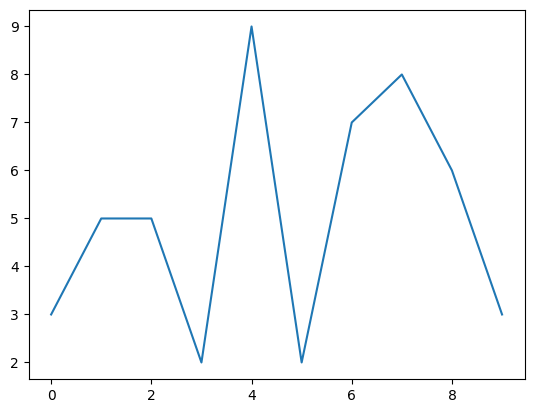

In [19]:
# Array of 0 - 9
x = np.arange(10)
# 10 random numbers, between 0 and 10
y = np.random.randint(0, 10, size=10)

# plot them as lines
plt.plot(x, y)

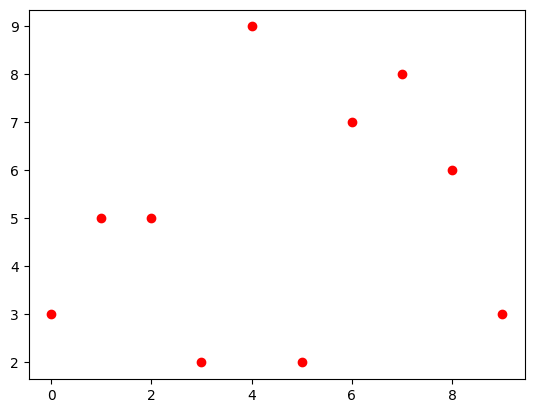

In [20]:
# plot them as just points -- specify "ls" ("linestyle") as a null string
plt.plot(x, y, 'ro', ls='')

##  Tasseled cap

In [21]:
print('Array shape before: {shp} (size is {sz})'.format(shp = image[:, :, 3].shape, sz = image[:, :, 3].size))

red = np.ndarray.flatten(image[:, :, 2])
nir = np.ndarray.flatten(image[:, :, 3])

print('Array shape after: {shp} (size is {sz})'.format(shp = nir.shape, sz = nir.size))

Array shape before: (250, 250) (size is 62500)
Array shape after: (62500,) (size is 62500)


Text(0.5, 1.0, 'Tasseled Cap')

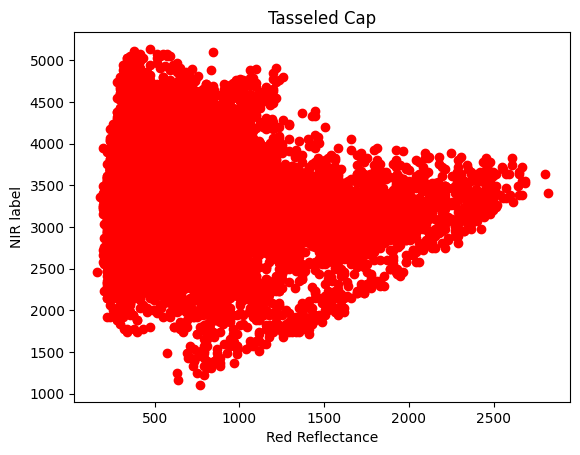

In [23]:
# Make the plot
plt.scatter(red, nir, color='r', marker='o')

# Add some axis labels
plt.xlabel('Red Reflectance')
plt.ylabel('NIR label')

# Add a title
plt.title('Tasseled Cap')

## Plotting 2D Image

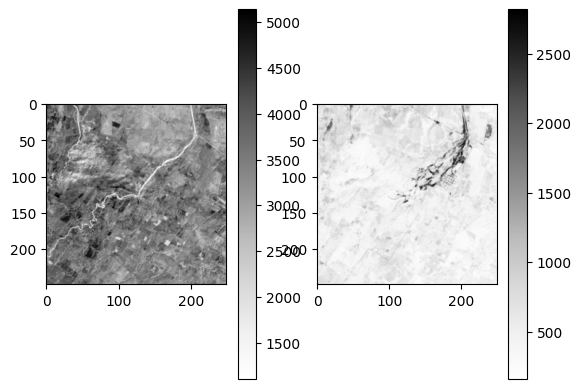

In [29]:
# use "imshow" for an image -- nir in first subplot, red in second
plt.subplot(121)
plt.imshow(image[:, :, 3], cmap=plt.cm.Greys)
plt.colorbar()

# Now red band in the second subplot (indicated by last of the 3 numbers)
plt.subplot(122)
plt.imshow(image[:, :, 2], cmap=plt.cm.Greys)
plt.colorbar()

## Plotting 3D Array Image

In [52]:
# Extract reference to SWIR1, NIR, and Red bands
index = np.array([4, 3, 2])
colors = image[:, :, index].astype(np.float64)
colors.min()

160.0

Colors shape:  (250, 250, 3)
colors max:  1.0


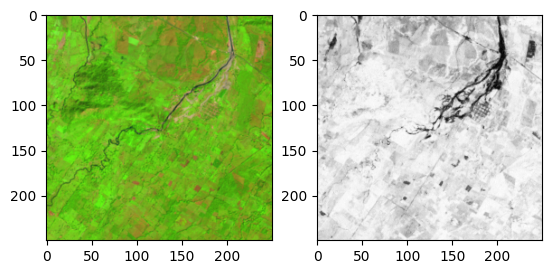

In [66]:
max_val = colors.max()
min_val = 0

# Enforce maximum and minimum values
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

print('Colors shape: ', colors.shape)

## Normalizing between 0 and 1
for b in range(colors.shape[2]):
    colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)

print('colors max: ', colors.max())

plt.subplot(121)
plt.imshow(colors)

# Show NDVI
plt.subplot(122)
plt.imshow(ndvi, cmap=plt.cm.Greys_r)